# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 4б

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **3 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [475]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'


# Теоретическая часть

Бутстреп:

1. 5 баллов Пусть $X_1, ..., X_n$  &mdash; некоторая выборка и $X_1^*, ..., X_n^*$ --- построенная по ней бутстрепная выборка. С какой вероятностью элемент $X_i$ исходной выборки попадет в бутстрепную выборку? К чему стремится эта вероятность с ростом размера выборки? Посчитайте среднее число уникальных элементов в бутстрепной выборке, если в исходной выборке все наблюдения различны.
	
2. \* (**бонус**, на подумать, доп баллы) Пусть $X_1, ..., X_n$ &mdash; выборка из равномерного распределения на отрезке $[0, \theta]$ и

 $\widehat{\theta}~=~X_{(n)}$ &mdash; оценка параметра $\theta$. Имеет ли смысл применять метод бутстрепа для оценки распределения $\widehat{\theta}$?

Проверка гипотез:


3. 5 баллов Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(\theta,1)$. Постройте РНМК уровня значимости $\alpha$ проверки

	a). $\mathrm{H}_0\colon \theta\geqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta<\theta_0$; 

  b). $\mathrm{H}_0\colon \theta\leqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta>\theta_0$.

	В каждом случае найдите мощность критерия.  Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.

4. 5 баллов Кот Василий (на фото слева) решил вывести правило, по которому можно отличать песиков от единорогов. Известно, что рост песиков имеет распределение $\Gamma(6/7, 2)$, а рост единорогов &mdash; распределение $\Gamma(5/44, 3)$. На основе роста животного $X$, кот Василий построил наиболее мощные критерии для проверки гипотез песик vs. единорог и единорог vs. песик. Какой ответ получит кот Василий для существа (на фото справа), рост которого составляет 6.66? Каковы мощности критериев? В ответе должно быть число. Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.

 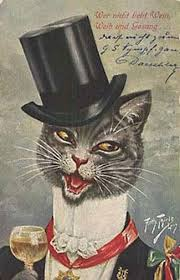
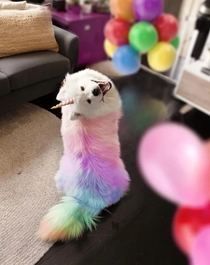


# Практическая часть


### Задача 5. 

15 баллов

Часто в физике и биологии встречаются выборки малого размера. В этом случае асимптотический доверительный интервал может давать не очень корректный ответ. Можно воспользоваться обычными доверительными интервалами или бутстрепом. Иногда обычные доверительные интервалы мы строить не умеем.

Посмотрим, насколько хорошо работают эти методы на маленькой выборке.


**1).** Рассмотрим модель $X_1, \ldots X_n \sim Exp(\theta)$.

Как мы знаем из теоретической части, эта модель хорошо описывает данные о разнице между соседними событиями, такими как появление фотона на детекторе или поломки различных систем.

В качестве оценки $\widehat \theta$ будем рассматривать $\frac{1}{\overline X}$.

Выпишите формулы для 

- а). Точного доверительного интервала для $\theta$;

- б). Асимптотического доверительного интервала для $\theta$;

  *Лайфхак: $Exp(\theta) = Gamma(\theta, 1)$, далее см. теор. дз.*

- в) Нормального бутстрепного интервала с использованием $\widehat \theta$;

- г) Центрального бутстрепного интервала с использованием $\widehat \theta$;

- д) Квантильного бутстрепного интервала с использованием $\widehat \theta$.



Ответ:

А) $(\frac{U_{\frac{1-\alpha}{2}}}{n\overline{X}};\frac{U_{\frac{1+\alpha}{2}}}{n\overline{X}})$, где $U_{\alpha}$ - альфа квантиль Г(1, n), n - размер выборки

Б) $(\frac{1}{\overline{X}} - \frac{Z_{\frac{1+\alpha}{2}}}{\sqrt{n}\overline{X}}; \frac{1}{\overline{X}} + \frac{Z_{\frac{1+\alpha}{2}}}{\sqrt{n}\overline{X}})$

В) $(\widehat{\theta} - Z_{\frac{1+\alpha}{2}}\sqrt{\widehat{v}_{boot}}; \widehat{\theta} + Z_{\frac{1+\alpha}{2}}\sqrt{\widehat{v}_{boot}})$

Г) $(2\widehat{\theta} - \theta^{*}_{\lceil B(1+\alpha)/2 \rceil}; 2\widehat{\theta} - \theta^{*}_{\lfloor B(1+\alpha)/2 \rfloor})$

Д) $(\theta^{*}_{\lfloor B(1+\alpha)/2 \rfloor}; \theta^{*}_{\lceil B(1+\alpha)/2 \rceil})$

Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку, количество бутстрепных выборок $B$ и может принимать дополнительные параметры для вашего удобства. 

In [100]:
def bootstrap(sample, B=6):
    
    '''Возвращает выборку оценок размера B'''
    inds = sps.randint(low=0, high=len(sample)).rvs((B, len(sample)))
    sample_of_thetas = 1 / np.average(sample[inds], axis = 1)

    return np.sort(sample_of_thetas)

Реализуйте вышеупомянутые доверительные интервалы в виде функций, принимающих на вход выборку и  выборку оценок, полученных с помощью бутстрепа. Функции могут принимать дополнительные параметры для вашего удобства. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. Обычный и асимптотический доверительный интервалы лучше также реализовать для всех подвыборок размера от 1 до n, как в предыдущем задании, так как это понадобится дальше.


В данной задаче полагайте $\alpha = 0.9$ (для наглядности).

Сгенерируйте реализации выборки из  $Exp(5)$ размеров 5 и  100 и выведите реализации вышеупомянутых доверительных интервалов для этих двух реализаций. Сделайте **выводы**.

*Обратите внимание на то, как задаются параметры экспоненциального распределеня в `scipy`.*

In [869]:
# (1 + 0.9) / 2 = 0.95
# (1 - 0.9) / 2 = 0.05

def exact_int(sample, B=0):
    # B needed for the same template, not used
    return  sps.gamma(a=len(sample)).ppf(0.05) / (len(sample) * np.average(sample)), sps.gamma(a=len(sample)).ppf(0.95) / (len(sample) * np.average(sample))

def asymp_int(sample, B=0):
    # B needed for the same template, not used
    return 1 / np.average(sample) - sps.norm.ppf(0.95)/(len(sample)**0.5 * np.average(sample)), 1 / np.average(sample) + sps.norm.ppf(0.95)/(np.sqrt(len(sample)) * np.average(sample))

def norm_boot_int(sample, B):
    sample_of_thetas = bootstrap(sample, B)
    return 1 / sample.mean() - sps.norm.ppf(0.95) * np.std(sample_of_thetas), 1 / sample.mean() + sps.norm.ppf(0.95) * np.std(sample_of_thetas)

def cent_boot_int(sample, B):
    sample_of_thetas = bootstrap(sample, B)
    return 1 / sample.mean() * 2 - sample_of_thetas[(B * 95 + 99) // 100 - 1], 1 / sample.mean() * 2 - sample_of_thetas[B * 5 // 100 - 1]

def kvnt_boot_int(sample, B):
    sample_of_thetas = bootstrap(sample, B)
    return sample_of_thetas[B * 5 // 100 - 1], sample_of_thetas[(B * 95 + 99) // 100 - 1]


test_1 = sps.expon(scale=0.2).rvs(5)
test_2 = sps.expon(scale=0.2).rvs(100)

print("sample size = 5", "\t\t\t\t", "sample size = 100")
print(exact_int(test_1), "\t", exact_int(test_2))
print(asymp_int(test_1), "\t", asymp_int(test_2))
print(norm_boot_int(test_1, 100), "\t", norm_boot_int(test_2, 100))
print(cent_boot_int(test_1, 100), "\t", cent_boot_int(test_2, 100))
print(kvnt_boot_int(test_1, 100), "\t", kvnt_boot_int(test_2, 100))


sample size = 5 				 sample size = 100
(1.4428601895602333, 6.703677940008268) 	 (4.42374617842534, 6.151296320861084)
(0.9681775818493676, 6.355429787622369) 	 (4.3928410202592785, 6.122452965324054)
(-3.058191445856044, 10.38179881532778) 	 (4.468930904736393, 6.046363080846939)
(-7.774399855160358, 5.641509239197915) 	 (3.9634512200191327, 5.916774061744947)
(2.1494639964740827, 11.361177336456244) 	 (4.652976854915666, 6.390325737913749)


**Вывод:** При увелечении размера выборки размер интервала становится меньше, то есть мы полчаем более точную оценку.

Теперь оценим, каков реальный уровень доверия этих доверительных интервалов при маленьком размере выборки. Для этого сгенерируйте 300 выборок размера 5 из $Exp(5)$. 

По каждой выборке посчитайте выборку оценок методом бутстрепа с $B = 300$. Посчитайте реализации всех доверительных интервалов, а также, какова доля реализаций выборок, для которых истинное значение параметра ($5$) попадает в реализацию доверительнго интервала (для каждого типа интервала в отдельности).

 Какой должна быть эта доля у доверительного интервала согласно определению? Выведите получившиеся доли для всех типов интервалов.

*Предупреждение: код может работать долго, особенно при неоптимальной реализации.*

Сделайте **выводы**.

In [835]:
estimate_int = lambda sample, f_template, B=300: list(f_template(sample, B)) # оценивает интервал по выборке и функции оценки
check_correct = lambda interval: interval[0] < 5 and interval[1] > 5 # для интервала проверяет есть ли 5
count_total_percentage = lambda samples, f_template, B=300: sum(list(map(check_correct, list(map(estimate_int, samples, [f_template for i in range(len(samples))], [B for i in range(len(samples))]))))) / len(samples) # собирает все воедино, считает количество где есть 5 и берет процент

samples = sps.expon(scale=0.2).rvs((300, 5))

print("Нормальный бутстрепный интервал:",  count_total_percentage(samples, norm_boot_int))
print("Центральный бутстрепный интервал:", count_total_percentage(samples, cent_boot_int))
print("Квантильный бутстрепный интервал:", count_total_percentage(samples, kvnt_boot_int))

Нормальный бутстрепный интервал: 0.9
Центральный бутстрепный интервал: 0.76
Квантильный бутстрепный интервал: 0.77


**Вывод:** У каждого интервала доля должна быть $\approx0.9$. Нормальный бутстрепный интервал в целом соответствует заданному уровню доверия, центральный и квантильный интервалы же показыват результат меньший ожидаемого. Уровень их доверия при фиксированном количестве бутстрепных выборок можно повысить, немного "подкрутив" квантили (так как мы сейчас играем с данными, происхождение которых мы знаем, то перед использованием на реальных эксперементальных данных как раз лучше это и сделать).

Проведите аналогичное исследование для обычного и асимптотичского доверительного интервалов при длине выборки $n = 100$. Сделайте **выводы**.

In [774]:
samples = sps.expon(scale=0.2).rvs((300, 100))

print("Точный доверительный интервал:",          count_total_percentage(samples, exact_int))
print("Асимптотический доверительный интервал:", count_total_percentage(samples, asymp_int))

Точный доверительный интервал: 0.9
Асимптотический доверительный интервал: 0.91


**Вывод:** У каждого интервала доля так же должна быть $\approx0.9$. Оба интервала соответствуют заявленному уровню доверия.

Теперь постройте графики зависимости обычного доверительного интервала и асимптотического доверительного интервала от $n$ (от 1 до 300) аналогично предыдущей задаче. Следите за читабельностью графиков, пользуйтесь `ylim`.


Помогли ли графики лучше понять произошедшее ранее?

Сделайте **выводы** по всей задаче.

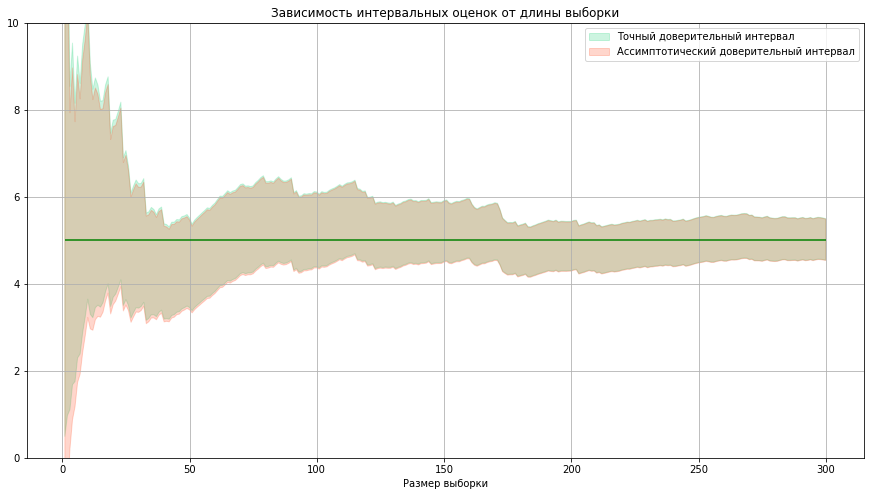

In [781]:
samples = sps.expon(scale=0.2).rvs((300))
res_arr_exact = []
res_arr_asymp = []

for i in range(1, 301):
    cut_samples = samples[:i]
    res_arr_exact.append(exact_int(cut_samples))
    res_arr_asymp.append(asymp_int(cut_samples))
res_arr_exact = np.array(res_arr_exact)
res_arr_asymp = np.array(res_arr_asymp)

plt.figure(figsize=(15, 8))
plt.fill_between(np.arange(1, 301), res_arr_exact[:, 0], res_arr_exact[:, 1], label = 'Точный доверительный интервал', alpha=0.2, color=green)
plt.fill_between(np.arange(1, 301), res_arr_asymp[:, 0], res_arr_asymp[:, 1], label = 'Ассимптотический доверительный интервал', alpha=0.2, color=red)
plt.hlines(5, 1, 300, color="green")
plt.legend()
plt.ylim(0, 10)
plt.xlabel('Размер выборки')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Зависимость интервальных оценок от длины выборки')  # имя графика
plt.grid()  # добавляем сетку
plt.show()

**Вывод:** Точный доверительный интервал, ассимптотический доверительный интервал и нормальный бутстрепный интервал соответстуют заявленному уровню доверия. Центральный бутстрепный и квантильный бутстрепный интервалы "маломерят", их уровень доверия немного ниже ожидаемого, что может быть вызвано зависимостью от реализаций бутстрепных выборок. При увеличении количества бутстрепных выборок и увеличении размера выборок такая проблема может исчезнуть, но так же можно искуственно добиться требуемого уровня доверия нарочно взяв квантили для большего альфа.

**2)** Бонусная часть

Проведите все те же исследования для модели $N(\theta, 1)$, которая описывает многие физические эксперименты. Есть ли различия? Как вы можете их объяснить? Сделайте **выводы**.

In [554]:
def bootstrap_norm(sample, B=6):
    
    '''Возвращает выборку оценок размера B'''
    inds = sps.randint(low=0, high=len(sample)).rvs((B, len(sample)))
    sample_of_thetas = np.average(sample[inds], axis = 1)

    return np.sort(sample_of_thetas)

In [836]:
# (1 + 0.9) / 2 = 0.95
# (1 - 0.9) / 2 = 0.05

def exact_int_norm(sample, B=0):
    return np.average(sample) - sps.norm.ppf(0.95) * 1 / len(sample)**0.5, np.average(sample) + sps.norm.ppf(0.95) * 1 / len(sample)**0.5

def asymp_int_norm(sample, B=0):
    # B needed for the same template, not used
    return np.average(sample) - sps.norm.ppf(0.95) * 1 / len(sample)**0.5, np.average(sample) + sps.norm.ppf(0.95) * 1 / len(sample)**0.5

def norm_boot_int_norm(sample, B):
    sample_of_thetas = bootstrap_norm(sample, B)
    return sample.mean() - sps.norm.ppf(0.95) * np.std(sample_of_thetas), sample.mean() + sps.norm.ppf(0.95) * np.std(sample_of_thetas)

def cent_boot_int_norm(sample, B):
    sample_of_thetas = bootstrap_norm(sample, B)
    return sample.mean() * 2 - sample_of_thetas[(B * 95 + 99) // 100 - 1], sample.mean() * 2 - sample_of_thetas[B * 5 // 100 - 1]

def kvnt_boot_int_norm(sample, B):
    sample_of_thetas = bootstrap_norm(sample, B)
    return sample_of_thetas[B * 5 // 100 - 1], sample_of_thetas[(B * 95 + 99) // 100 - 1]

In [848]:
estimate_int_norm = lambda sample, f_template, B=300: list(f_template(sample, B)) # оценивает интервал по выборке и функции оценки
check_correct_norm = lambda interval: interval[0] < 0 and interval[1] > 0 # для интервала проверяет есть ли 0
count_total_percentage_norm = lambda samples, f_template, B=300: sum(list(map(check_correct_norm, list(map(estimate_int_norm, samples, [f_template for i in range(len(samples))], [B for i in range(len(samples))]))))) / len(samples) # собирает все воедино, считает количество где есть 5 и берет процент


samples = sps.norm().rvs((300, 5))

print("Нормальный бутстрепный интервал:",  count_total_percentage_norm(samples, norm_boot_int_norm))
print("Центральный бутстрепный интервал:", count_total_percentage_norm(samples, cent_boot_int_norm))
print("Квантильный бутстрепный интервал:", count_total_percentage_norm(samples, kvnt_boot_int_norm))

Нормальный бутстрепный интервал: 0.81
Центральный бутстрепный интервал: 0.82
Квантильный бутстрепный интервал: 0.82


**Вывод:** У каждого интервала доля должна быть $\approx0.9$. И нормальный и центральный и квантильный интервалы показыват результат меньший ожидаемого. Как и в случае с экспоненциальным распредилением уровень их доверия при фиксированном количестве бутстрепных выборок можно (и даже нужно) повысить, немного "подкрутив" квантили.

In [870]:
samples = sps.norm().rvs((300, 100))

print("Точный доверительный интервал:",          count_total_percentage_norm(samples, exact_int_norm))
print("Асимптотический доверительный интервал:", count_total_percentage_norm(samples, asymp_int_norm))

Точный доверительный интервал: 0.91
Асимптотический доверительный интервал: 0.91


**Вывод** У каждого интервала доля так же должна быть $\approx0.9$. Оба интервала соответствуют заявленному уровню доверия.

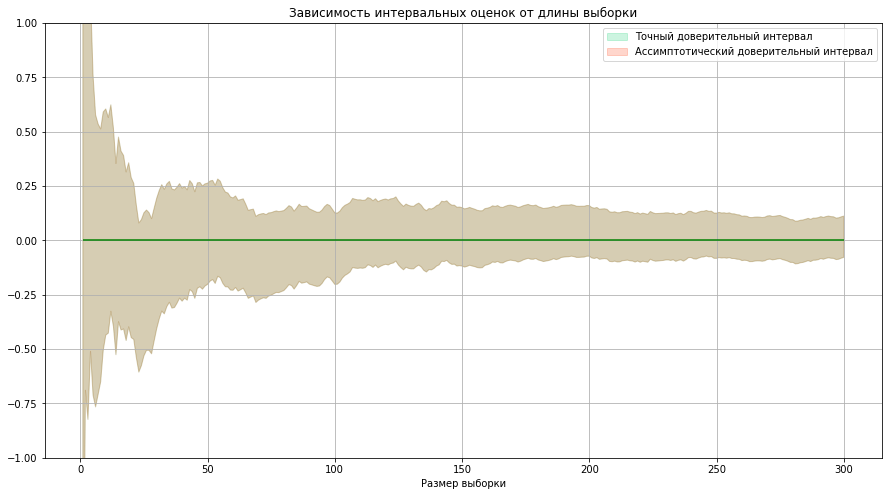

In [800]:
samples = sps.norm().rvs((300))
res_arr_exact = []
res_arr_asymp = []

for i in range(1, 301):
    cut_samples = samples[:i]
    res_arr_exact.append(exact_int_norm(cut_samples))
    res_arr_asymp.append(asymp_int_norm(cut_samples))
res_arr_exact = np.array(res_arr_exact)
res_arr_asymp = np.array(res_arr_asymp)

plt.figure(figsize=(15, 8))
plt.fill_between(np.arange(1, 301), res_arr_exact[:, 0], res_arr_exact[:, 1], label = 'Точный доверительный интервал', alpha=0.2, color=green)
plt.fill_between(np.arange(1, 301), res_arr_asymp[:, 0], res_arr_asymp[:, 1], label = 'Ассимптотический доверительный интервал', alpha=0.2, color=red)
plt.hlines(0, 1, 300, color="green")
plt.legend()
plt.ylim(-1, 1)
plt.xlabel('Размер выборки')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Зависимость интервальных оценок от длины выборки')  # имя графика
plt.grid()  # добавляем сетку
plt.show()

**Вывод:** Отличается данная модель от экспоненциальной тем, что точный доверительный интервал совпадает с ассимптотическим доверительным интервалом. Они соответстуют заявленному уровню доверия. Все бутстрепные интервалы показывают уровень доверия немного ниже ожидаемого (причем примерно одинаковый). Это вызвано зависимостью зависимостью от реализаций бутстрепных выборок для центрального и квантильного интервалов и отличием бутстрепной оценки $\widehat{v}_{boot}$ от корня частного дисперсии и размера выборки для нормального бутстрепного интервала. При увеличении количества бутстрепных выборок и увеличении размера выборок такая проблема должна исчезнуть, но так же можно искуственно добиться требуемого уровня нарочно доверия взяв квантили для большего альфа.

### Задача 6.

12 баллов



Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

Известно, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. Это получается аналогично [примеру](https://wiki.yandex.ru/homepage/phystechdatascience-chast-1/vesna-2021/.files/examplernmk-1.pdf), разобранному на wiki. 

Чему при этом равно $c_\alpha$? Как определить p-value?

$T(X) = \sum\limits_{i=1}^n X_i \ \ \stackrel{\mathsf{H}_0}{\sim}\ \ Bin(n, \frac{1}{2})$

откуда

$c_{\alpha} - (1 - \alpha)$ квантиль распределения $Bin(n, \frac{1}{2})$

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$. Для этого сгенерируйте разные реализации выборок и посчитайте по ним реализации статистики.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

Генерируем выборки при справедливости основной гипотезы. Теорема о равномерности $p_{value}$ неприменима ввиду дискретности распределения.

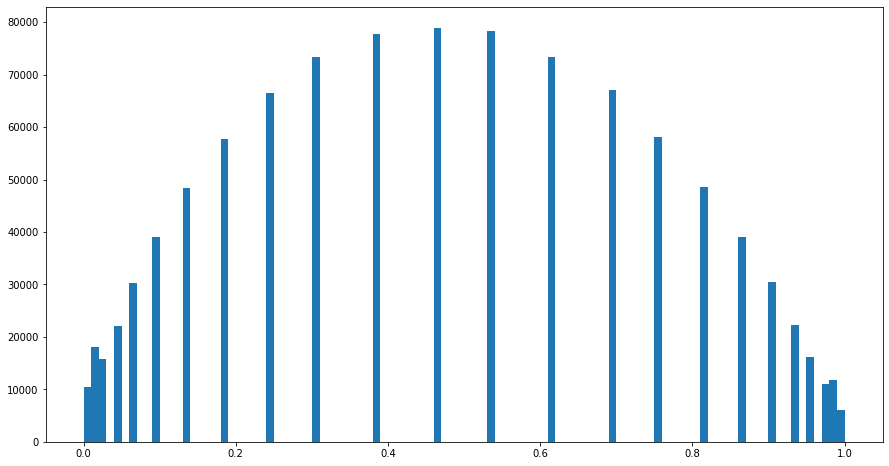

In [1154]:
фдзрф = 0.95
sample_size = 100
sample_count = 10**6
samples = sps.bernoulli(p=0.5).rvs(size=(sample_count, sample_size))
T_stat = np.sum(samples, axis=1)
pvalues = sps.binom(n=sample_size, p=0.5).sf(T_stat)

plt.figure(figsize=(15,8))
plt.hist(pvalues, bins=100);
plt.show()

Критерий не меняется при рассмотрении сложной основной гипотезы

$\mathsf{H}_0\colon\ p \leqslant 0.5\ \ vs.\ \ \mathsf{H}_1\colon\ p\ > 0.5$

Посмотрим, что будет при $p$ из основной гипотизы.

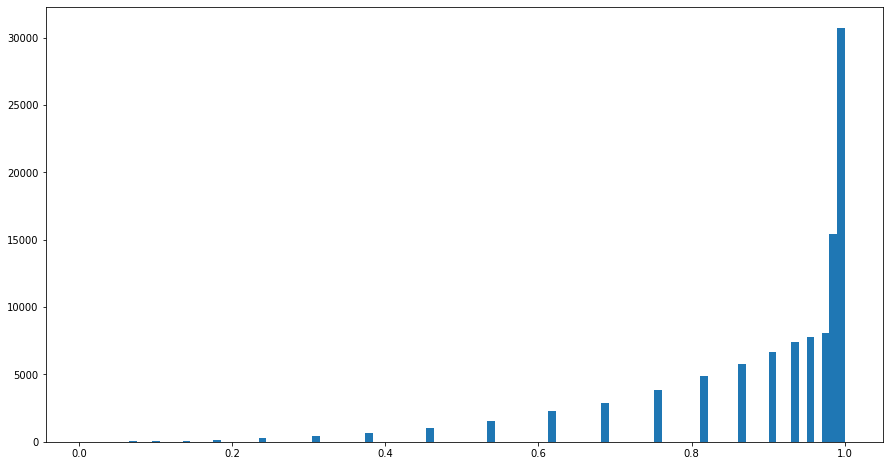

In [1095]:
sample_size = 100
sample_count = 10**5
samples = sps.bernoulli(p=0.4).rvs(size=(sample_count, sample_size))
T_stat = np.sum(samples, axis=1)
pvalues = sps.binom(n=sample_size, p=0.5).sf(T_stat)

plt.figure(figsize=(15,8))
plt.hist(pvalues, bins=100);
plt.show()

Как мы видим, в большиинстве случаев основная гипотеза не отвергается.

Посмотрим теперь тоже самое при альтернативе.

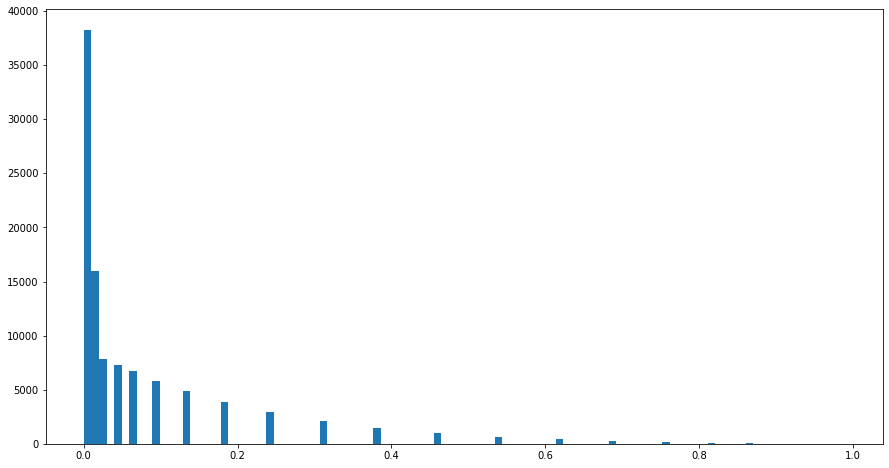

In [1096]:
sample_size = 100
sample_count = 10**5
samples = sps.bernoulli(p=0.6).rvs(size=(sample_count, sample_size))
T_stat = np.sum(samples, axis=1)
pvalues = sps.binom(n=sample_size, p=0.5).sf(T_stat)

plt.figure(figsize=(15,8))
plt.hist(pvalues, bins=100);
plt.show()

Как мы видим, в большинстве случаев основная гипотеза отвергается.

In [1068]:
n = [5, 10, 50, 100, 500, 1000]
alpha = 0.95

c_alpha_arr = []
T_stat_arr = []
pvalue_arr = []

for sample_size in n:
    sample = sps.bernoulli(p=0.5).rvs(sample_size)
    c_alpha_arr.append(sps.binom(n=sample_size, p=0.5).ppf(alpha))
    T_stat_arr.append(np.sum(sample))
    pvalue_arr.append(sps.binom(n=sample_size, p=0.5).sf(T_stat_arr[-1]))

data = {
    "size": pd.Series(n),
    "c_alpha": pd.Series(c_alpha_arr),
    "T_stat": pd.Series(T_stat_arr),
    "p_value": pd.Series(pvalue_arr)
}
df = pd.DataFrame(data)
df

,size,c_alpha,T_stat,p_value
0,5,4.0,1,0.812500
1,10,8.0,5,0.376953
2,50,31.0,27,0.239944
3,100,58.0,51,0.382177
4,500,268.0,244,0.688595
5,1000,526.0,512,0.214605


Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 

Для того чтобы считать, что есть свзять между черным котом и неудачей, нужно отвергнуть нулевую гипотезу, то есть $p_{value} < 0.05$

Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 -- отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [1104]:
sample_count = 10
sample_size= 5
p = 0.75
samples = sps.bernoulli(p=p).rvs((sample_count, sample_size))
T_stat = np.sum(samples, axis=1)
pvalue = sps.binom(n=sample_size, p=0.5).sf(T_stat)
data = {
    "T_stat": pd.Series(T_stat),
    "p_value": pd.Series(pvalue),
    "H_0 denied": pd.Series(1*(pvalue<1-alpha))
}
df = pd.DataFrame(data)
df

,T_stat,p_value,H_0 denied
0,5,0.00000,1
1,4,0.03125,1
2,3,0.18750,0
3,4,0.03125,1
4,4,0.03125,1
5,4,0.03125,1
6,3,0.18750,0
7,3,0.18750,0
8,4,0.03125,1
9,2,0.50000,0


In [1099]:
sample_count = 10
sample_size= 10**5
p = 0.51
samples = sps.bernoulli(p=p).rvs((sample_count, sample_size))
T_stat = np.sum(samples, axis=1)
pvalue = sps.binom(n=sample_size, p=0.5).sf(T_stat)
data = {
    "T_stat": pd.Series(T_stat),
    "p_value": pd.Series(pvalue),
    "H_0 denied": pd.Series(1*(pvalue<1-alpha))
}
df = pd.DataFrame(data)
df

,T_stat,p_value,H_0 denied
0,50864,2.279438e-08,1
1,50992,1.722271e-10,1
2,51082,3.781477e-12,1
3,51022,4.995810e-11,1
4,50764,6.650166e-07,1
5,50754,9.121925e-07,1
6,50938,1.462397e-09,1
7,50925,2.406118e-09,1
8,50973,3.703425e-10,1
9,51052,1.398937e-11,1


**Вывод:** Размер выборки довольно сильно влияет на мощность $p_{value}$. Несмотря на то, что в первом случае у нас параметр отличался довольно сильно, присутствуют наборы, при которых гипотеза не отвергалась. Во втором же случае при небольшом отличии в параметрах p, при всех наборах данных нулевая гипотеза отвергалась.

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05. По оси $x$ должно быть значение $p$, по оси $y$ &mdash; значение мощности критерия при данном параметре. Мощность считается аналитически, аналогично примеру на wiki. Обратите внимание, что текущая задача немного отличается от примера. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

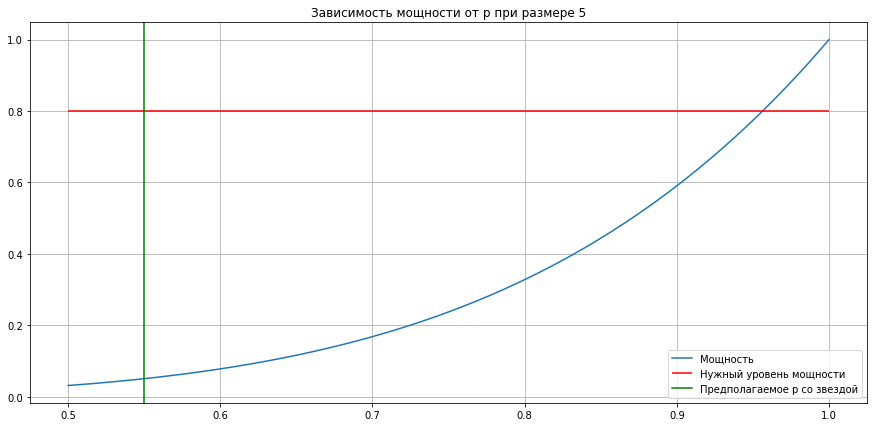

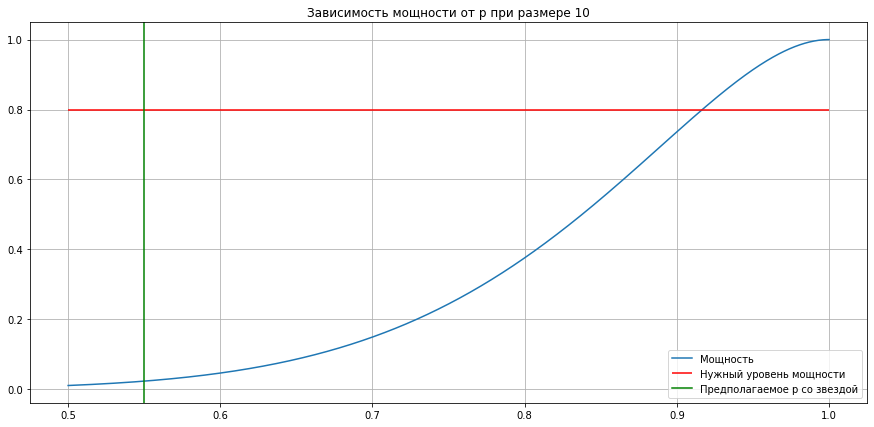

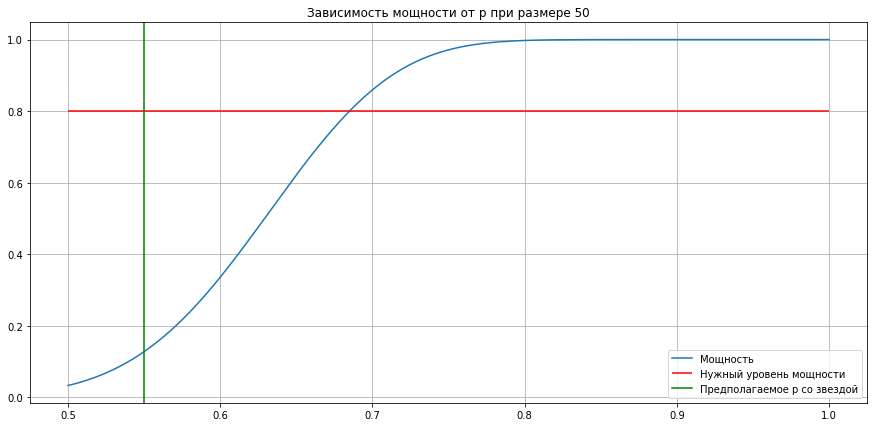

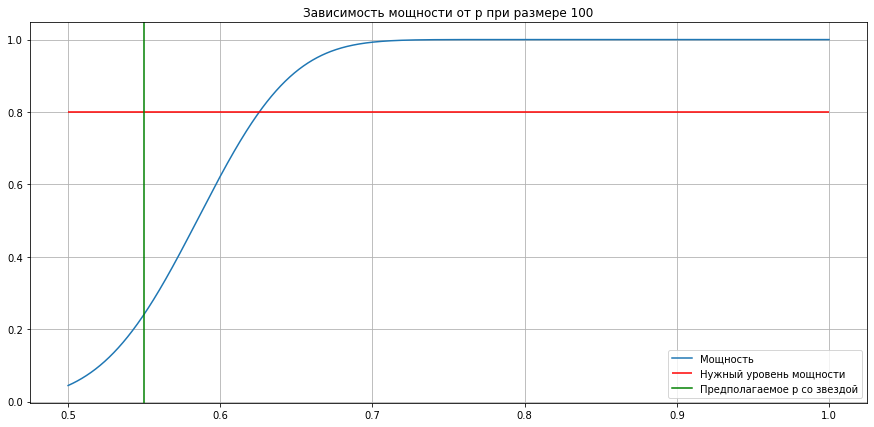

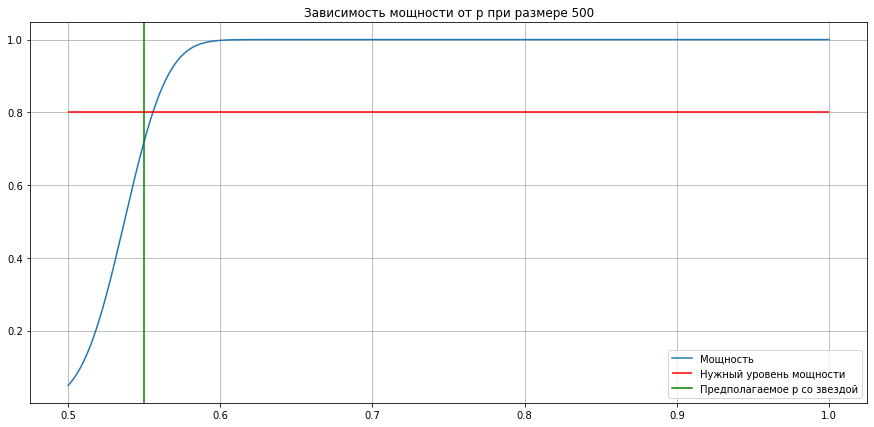

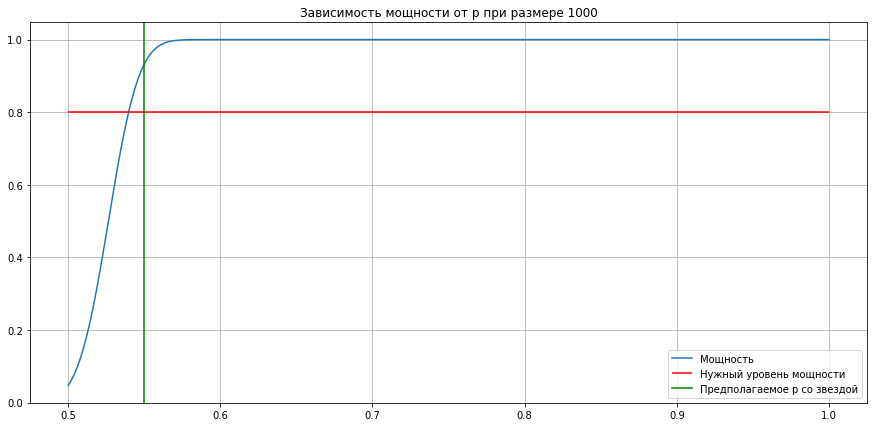

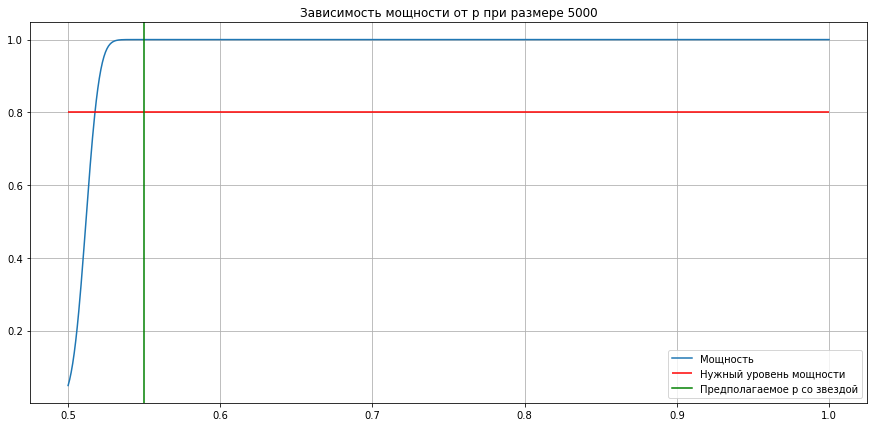

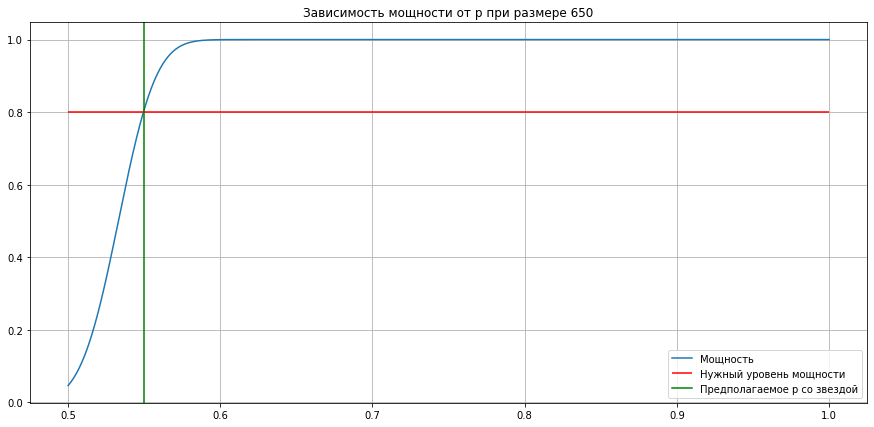

In [1123]:
p_zv = 0.55
n = [5, 10, 50, 100, 500, 1000, 5000, 650]
for size in n:
    p = np.linspace(0.5, 1, 1000)
    sample = sps.bernoulli(p=0.5).rvs(size)
    c_alpha = sps.binom(n=size, p=0.5).ppf(alpha)
    beta = sps.binom(n=size, p=p).sf(c_alpha)
    
    plt.figure(figsize=(15,7))
    plt.plot(p, beta, label="Мощность")
    plt.hlines(0.8, 0.5, 1, color="red", label="Нужный уровень мощности")
    plt.axvline(x=p_zv, color="green", label="Предполагаемое p со звездой")
    plt.title("Зависимость мощности от р при размере " + str(size))
    plt.grid()
    plt.legend()
    plt.show()

Из графиков видно, что для выбранного $p$ со звездой оптимальный размер составяет $\approx650$ элементов

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.

In [1153]:
sample_count = 10
sample_size= 650
p = 0.54
samples = sps.bernoulli(p=p).rvs((sample_count, sample_size))
T_stat = np.sum(samples, axis=1)
pvalue = sps.binom(n=sample_size, p=0.5).sf(T_stat)
data = {
    "T_stat": pd.Series(T_stat),
    "p_value": pd.Series(pvalue),
    "H_0 denied": pd.Series(1*(pvalue<1-alpha))
}
df = pd.DataFrame(data)
df

,T_stat,p_value,H_0 denied
0,350,0.022688,1
1,347,0.038738,1
2,350,0.022688,1
3,342,0.084881,0
4,350,0.022688,1
5,354,0.010294,1
6,374,0.000050,1
7,354,0.010294,1
8,339,0.127661,0
9,350,0.022688,1


In [1138]:
sample_count = 10
sample_size= 650
p = 0.56
samples = sps.bernoulli(p=p).rvs((sample_count, sample_size))
T_stat = np.sum(samples, axis=1)
pvalue = sps.binom(n=sample_size, p=0.5).sf(T_stat)
data = {
    "T_stat": pd.Series(T_stat),
    "p_value": pd.Series(pvalue),
    "H_0 denied": pd.Series(1*(pvalue<1-alpha))
}
df = pd.DataFrame(data)
df

,T_stat,p_value,H_0 denied
0,387,4.380988e-07,1
1,362,1.616641e-03,1
2,356,6.705094e-03,1
3,369,2.362262e-04,1
4,372,9.482837e-05,1
5,365,7.343293e-04,1
6,384,1.433285e-06,1
7,387,4.380988e-07,1
8,375,3.607615e-05,1
9,373,6.912472e-05,1


**Вывод:** При выбранном значении $p^{*}$ был найден оптимальный размер выборки. Вижно, что при значениях $p > p^{*}$ для всех наборов данных гипотеза была отвергнута, что свидетельствует о меаленькой вероятности ошибки первого рода после $p^{*}$. При $0.5 < p < p^{*}$ присутствуют наборы данных, при которых нулевая гипотеза не была отвергнута (хотя и являлась неверной), что говорит о наличии ошибок второго рода.